In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
cities=['Kiev', 'Lvov', 'Odessa', 'Kharkov', 'Dnepr']

In [18]:
#data =pd.read_csv('Data/rent_offers.csv')
data =pd.read_csv('Data/rent_offers_clean.csv')

In [19]:
data.drop(labels=['posted_by', 'Unnamed: 0'], axis=1, inplace = True)
data.dropna(axis=0, how='any', inplace=True)
data = data.astype({'floor': 'int32', 'building_height_floors': 'int32', 'rooms': 'int32'})

In [20]:
data.describe(percentiles= [.01, .25, .5, .75, .95, .99])

,price,floor,building_height_floors,apt_area_sqm,kitchen_area_sqm,rooms
count,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000
mean,13436.018705,6.150006,11.268449,51.603090,11.102567,1.659173
std,13794.672046,5.083293,7.196621,22.013997,6.430227,0.747003
min,150.000000,1.000000,1.000000,12.000000,0.600000,1.000000
1%,3500.000000,1.000000,1.000000,19.000000,1.800000,1.000000
25%,7000.000000,3.000000,5.000000,37.000000,7.000000,1.000000
50%,9500.000000,5.000000,9.000000,46.000000,9.000000,2.000000
75%,14000.000000,8.000000,16.000000,60.000000,14.000000,2.000000
95%,36778.000000,17.000000,25.000000,98.000000,23.000000,3.000000
99%,78765.000000,24.000000,30.000000,130.000000,35.000000,4.000000


In [21]:
data.groupby(['rooms', 'city']).price.describe(percentiles= [.01, .25, .5, .75, .95, .99])

count          mean           std      min        1%  \
rooms city                                                             
1     Dnepr    2480.0   7066.302419   2863.258575   2100.0   3000.00   
      Kharkov  3552.0   7708.218468   4552.887325   1200.0   3151.00   
      Kiev     4192.0  12978.017891   6022.844285    600.0   5336.50   
      Lvov     2676.0   8792.526158   3320.267874    250.0   3000.00   
      Odessa   4499.0   7872.731051   2974.846854    350.0   3500.00   
2     Dnepr    2467.0   9515.601946   5203.670771   2500.0   3995.94   
      Kharkov  1953.0  11200.018433   6493.256851    550.0   4000.00   
      Kiev     3990.0  22268.890226  15127.164449   2000.0   7289.00   
      Lvov     2003.0  10635.172242   4606.770378    150.0   3604.00   
      Odessa   2484.0  10674.049517   5834.121064    600.0   4000.00   
3     Dnepr     819.0  11008.897436   6169.882033   2000.0   3254.00   
      Kharkov   526.0  13465.467681   7186.656328   3500.0   5000.00   
      Kiev     1872.0  41931.529915  30009.412375    300.0   9000.00   
      Lvov      608.0  13719.103618   7525.479279   2300.0   4500.00   
      Odessa    682.0  15729.890029   9831.674384   2500.0   5000.00   
4     Dnepr      33.0  20487.090909  13683.200522   7000.0   7160.00   
      Kharkov    44.0  18122.568182   9399.675656   4500.0   4500.00   
      Kiev      216.0  68270.949074  38276.648968  13000.0  15000.00   
      Lvov       46.0  16577.065217   7834.896384   6000.0   6225.00   
      Odessa     64.0  25027.328125  14347.999506   5000.0   5630.00   
5     Dnepr       2.0   9750.000000   7424.621202   4500.0   4605.00   
      Kharkov     4.0  31988.000000  10214.328792  21551.0  21654.47   
      Kiev       11.0  43560.090909  21007.700276  10000.0  10300.00   
      Lvov        5.0  23881.000000   5339.997378  15000.0  15326.72   
      Odessa      4.0  27345.750000   9306.995877  20000.0  20000.00   

                    25%      50%       75%        95%        99%       max  
rooms city                                                                  
1     Dnepr     5000.00   6300.0   8000.00   13500.00   16000.00   17000.0  
      Kharkov   5500.00   7000.0   8500.00   14440.00   19691.00  177167.0  
      Kiev      9000.00  12000.0  15000.00   26255.00   35582.00   44373.0  
      Lvov      6000.00   8500.0  10911.00   14816.00   18331.75   22186.0  
      Odessa    5700.00   7300.0   9500.00   13469.00   18384.00   22999.0  
2     Dnepr     6000.00   8000.0  11000.00   18500.00   26996.70   67000.0  
      Kharkov   7000.00   9000.0  13547.00   23630.00   33366.76   76472.0  
      Kiev     12000.00  16000.0  27371.00   54367.20   77171.00  105020.0  
      Lvov      7000.00  10000.0  13200.00   19691.00   23547.84   26255.0  
      Odessa    7000.00   9000.0  13051.00   21004.00   32768.34   80815.0  
3     Dnepr     7000.00   9000.0  12999.50   24100.00   33764.24   35237.0  
      Kharkov   8500.00  11000.0  16197.00   27276.25   39845.75   44482.0  
      Kiev     18000.00  30108.0  61737.25  100016.35  134671.83  163539.0  
      Lvov      8500.00  12000.0  16974.50   27331.10   39645.26   49268.0  
      Odessa    8500.00  12000.0  20126.75   36766.50   52365.01   54742.0  
4     Dnepr    10000.00  15000.0  27371.00   40000.00   59331.04   68428.0  
      Kharkov  12000.00  13523.5  25584.25   36373.10   36773.27   36778.0  
      Kiev     34798.00  65656.5  97735.00  135674.75  148160.00  182711.0  
      Lvov     10175.00  15376.5  20000.00   34186.50   36228.25   36757.0  
      Odessa   13671.50  19562.0  37713.00   52203.00   54111.69   54513.0  
5     Dnepr     7125.00   9750.0  12375.00   14475.00   14895.00   15000.0  
      Kharkov  24137.75  32196.5  40046.75   41615.75   41929.55   42008.0  
      Kiev     32402.00  46336.0  55887.00   72020.50   77433.70   78787.0  
      Lvov     23168.00  26255.0  26270.00   28223.60   28614.32   28712.0  
      Odessa   20000.00  25000.0  32345.75   37975.55   39101.51   39

In [22]:
data_cut = data[data.price < data.price.quantile(.99)]
data_cut = data_cut[data_cut.price > data.price.quantile(.01)]

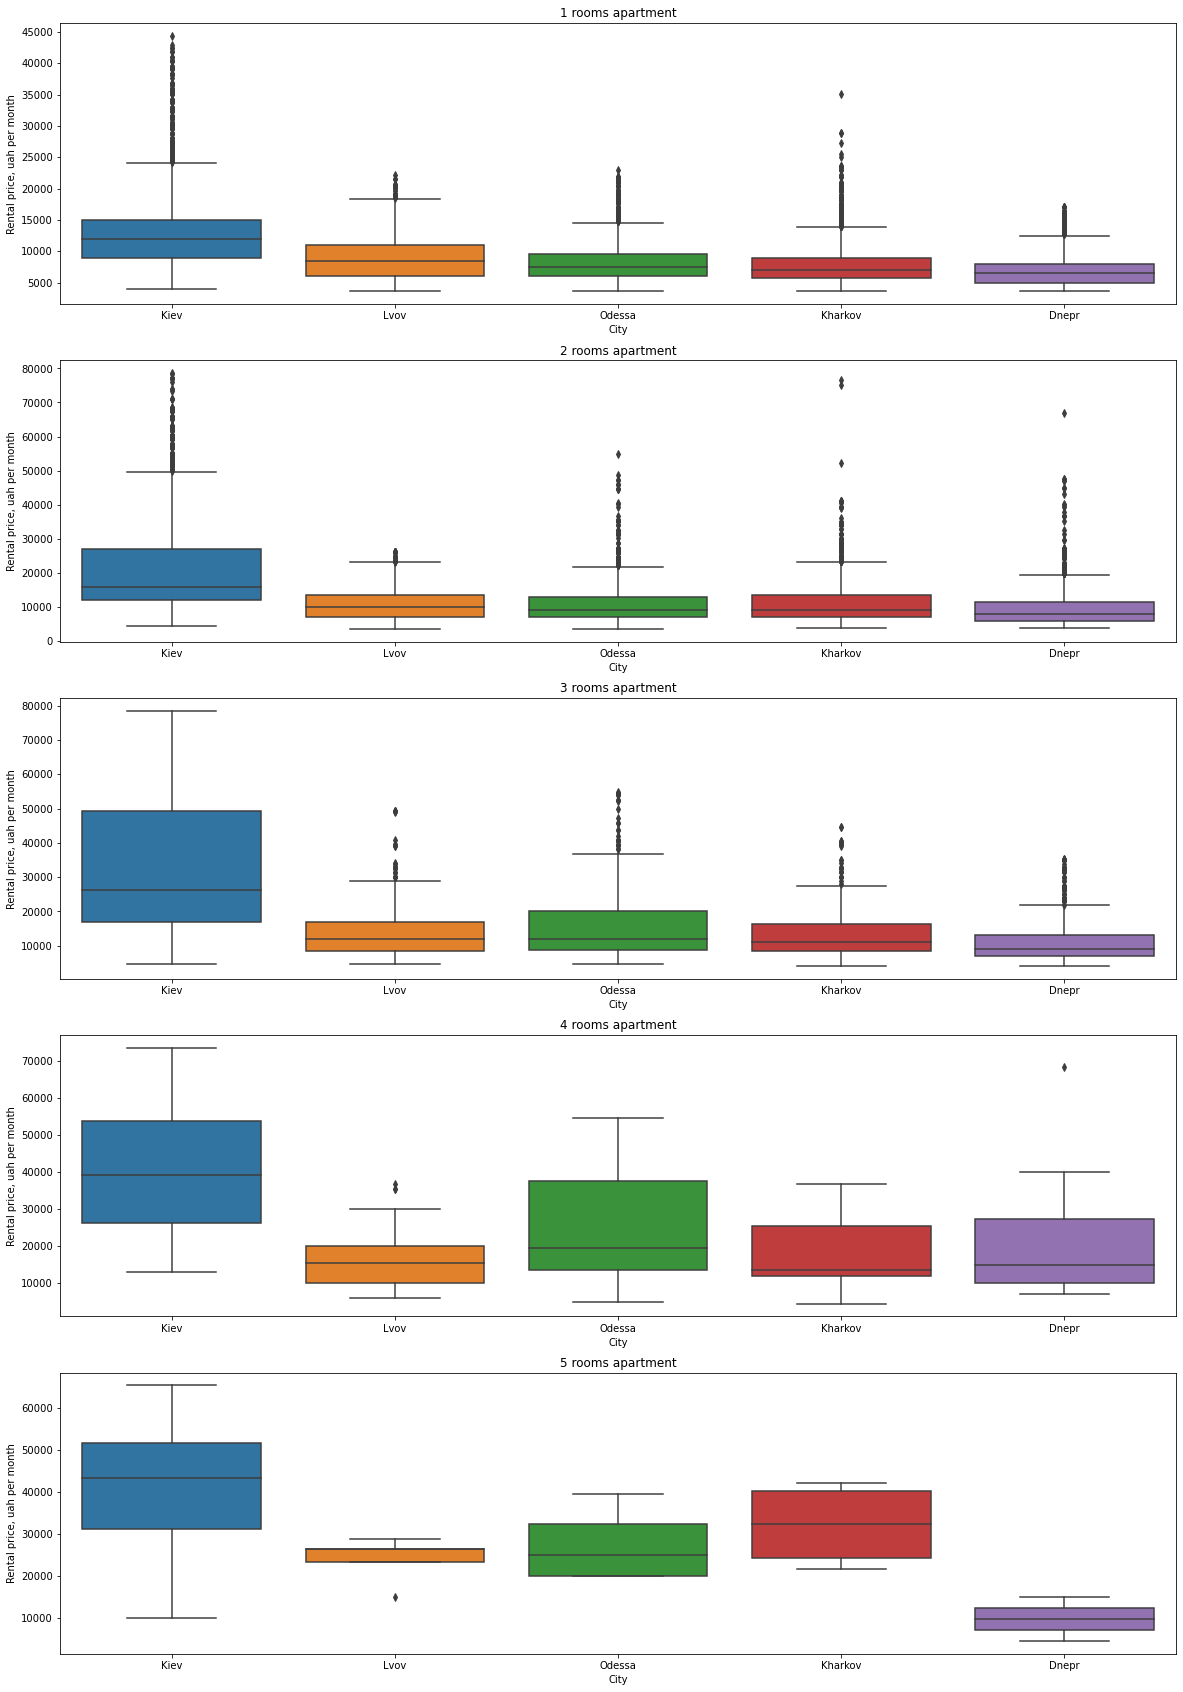

In [35]:
%matplotlib inline
fig = plt.figure(figsize=(20,30))

for i in range (1,6):
    plt.subplot(5, 1, i)
    sns.boxplot(data = data_cut[data_cut.rooms == i], y='price', x= "city",)
    plt.title(f'{i} rooms apartment')
    plt.xlabel("City")
    plt.ylabel("Rental price, uah per month")
plt.show()

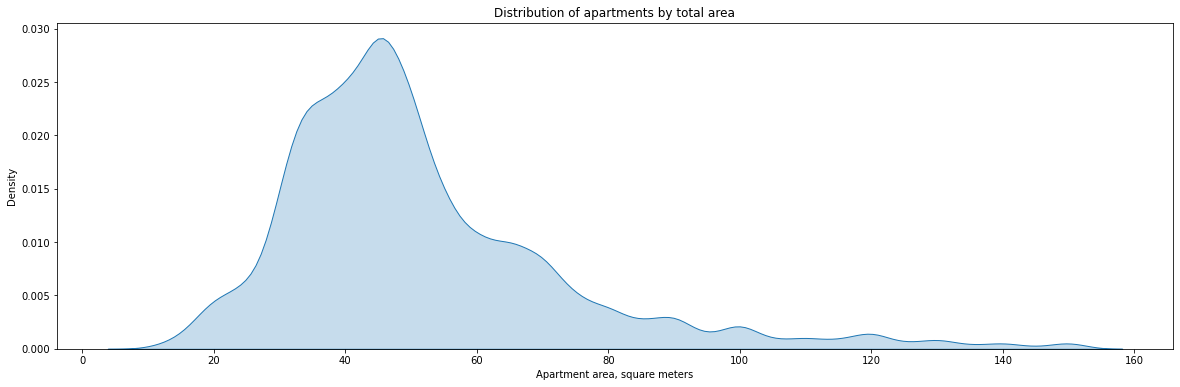

In [60]:
%matplotlib inline
fig = plt.figure(figsize=(20,6))
sns.kdeplot(data = data, x='apt_area_sqm', fill=True)
#binwidth=1, stat='percent')
plt.title('Distribution of apartments by total area')
plt.xlabel("Apartment area, square meters")
plt.show()

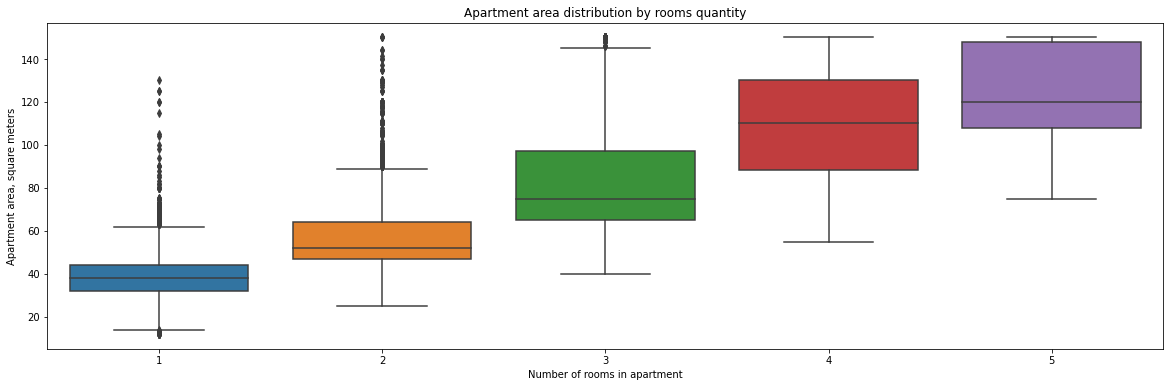

In [41]:
%matplotlib inline
fig = plt.figure(figsize=(20,6))
sns.boxplot(data = data_cut[data_cut.apt_area_sqm<300], y='apt_area_sqm', x= "rooms")
plt.title('Apartment area distribution by rooms quantity')
plt.xlabel("Number of rooms in apartment")
plt.ylabel("Apartment area, square meters")
plt.show()

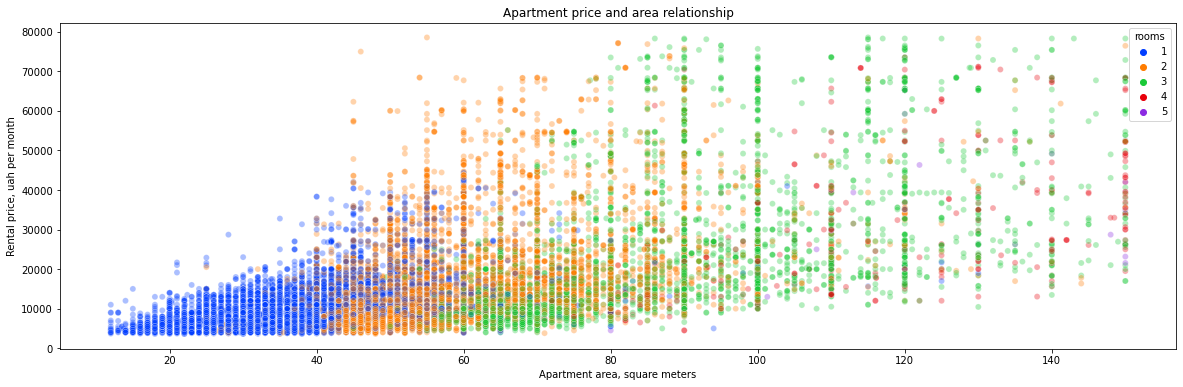

In [65]:
%matplotlib inline
fig = plt.figure(figsize=(20,6))
sns.scatterplot(data = data_cut[data_cut.apt_area_sqm<300], y='price', x= "apt_area_sqm", alpha=0.33, hue='rooms', palette='bright')
plt.title('Apartment price and area relationship')
plt.xlabel("Apartment area, square meters")
plt.ylabel("Rental price, uah per month")
plt.show()

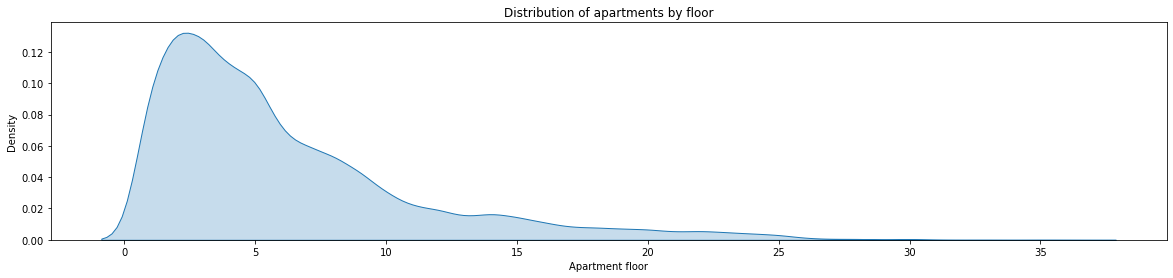

In [62]:
%matplotlib inline
fig = plt.figure(figsize=(20,4))
sns.kdeplot(data = data, x='floor', fill=True)
plt.title('Distribution of apartments by floor')
plt.xlabel("Apartment floor")
plt.show()

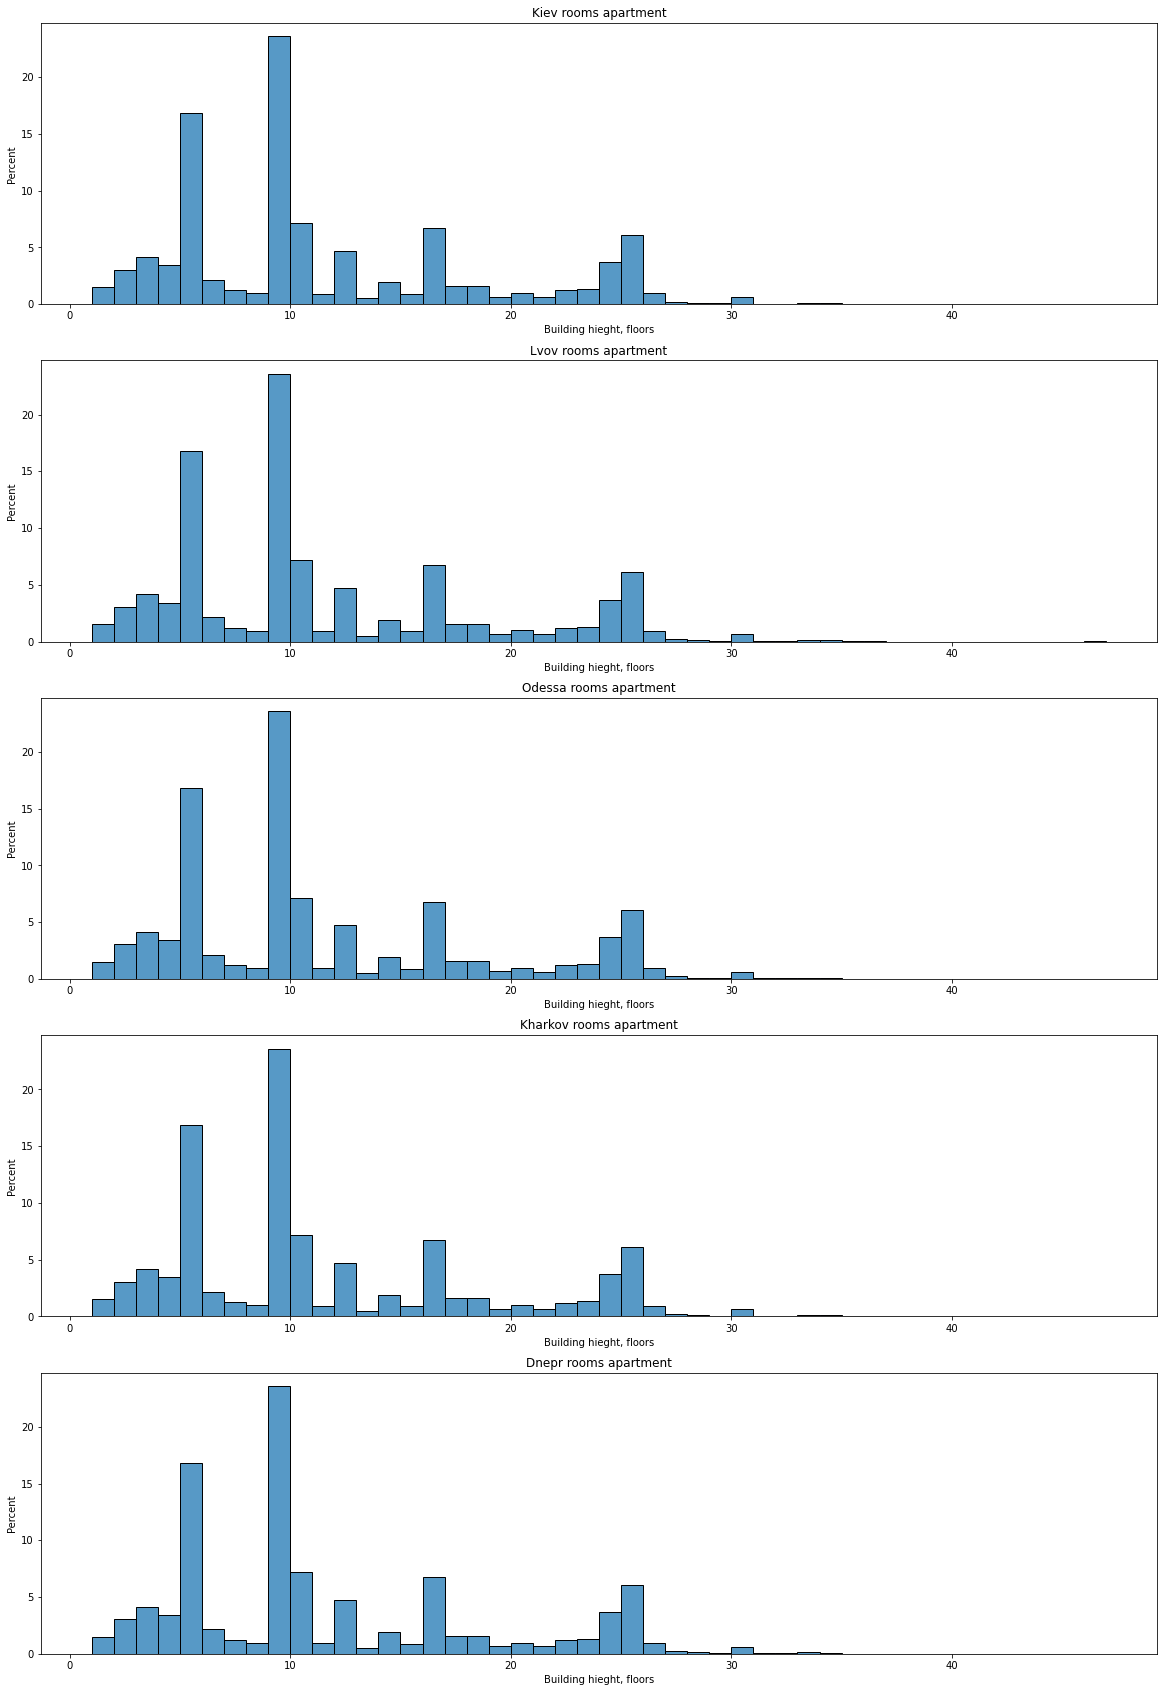

In [63]:
%matplotlib inline
fig = plt.figure(figsize=(20,30))

for i,city in enumerate(cities):
    plt.subplot(5, 1, i+1)
    #limitng by 50 floors, as it is max. building height in country
    sns.histplot(data = data_cut[data_cut.building_height_floors<50], x= "building_height_floors", binwidth=1, stat='percent')
    plt.title(f'{city} rooms apartment')
    plt.xlabel("Building hieght, floors")
plt.show()